In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

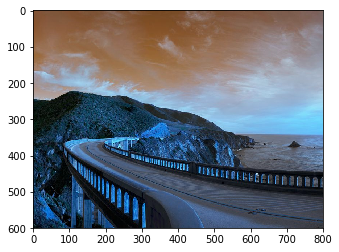

In [4]:
road = cv2.imread('E://University-working/openCV python/Udemy - Python for Computer Vision with OpenCV and Deep Learning 2019-9/Computer-Vision-with-Python/DATA/road_image.jpg')
road_copy = np.copy(road)
plt.imshow(road)

In [5]:
marker_image = np.zeros(road.shape[:2],dtype=np.int32)
segments = np.zeros(road.shape,dtype=np.uint8)

In [6]:
from matplotlib import cm

In [7]:
cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [8]:
def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

In [9]:
colors = []
for i in range(10):
    colors.append(create_rgb(i))
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [10]:
current_markers = 1
n_markers =10
markers_updates = False

In [11]:
def mouse_callback(event,x,y,flags,param):
    global markers_updates
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(marker_image,(x,y),10,(current_markers),-1)
        cv2.circle(road_copy,(x,y),10,colors[current_markers],-1)
        markers_updates = True

In [ ]:
cv2.namedWindow("Road Image")
cv2.setMouseCallback("Road Image",mouse_callback)

while True:
    cv2.imshow("watershed segments",segments)
    cv2.imshow("Road Image",road_copy)
    
    k = cv2.waitKey(1)
    if k == 27:
        break
    elif k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[:2],dtype=np.int32)
        segments = np.zeros(road.shape,dtype=np.uint8)
    elif k>0 and chr(k).isdigit():
        current_markers = int(chr(k))
        
    if markers_updates:
        marker_image_copy = marker_image.copy()
        cv2.watershed(road,marker_image_copy)
        segments = np.zeros(road.shape,dtype=np.uint8)
        for color_ind in range(n_markers):
            segments[marker_image_copy==(color_ind)] = colors[color_ind]
    
